** Notes **
* Be very careful when constructing the resolution matrix. If missed by a transpose, the result will be wrong!!

In [1]:
# %cd ~/dev/graphite-DOS/irradiated-notebooks/

In [2]:
from __future__ import (absolute_import, division, print_function)

import os, sys
import numpy as np
from matplotlib import pyplot as plt
import numpy as np, histogram.hdf as hh, histogram as H
from scipy.interpolate import interp1d
import warnings
from numpy import linalg as LA

In [3]:
# %matplotlib notebook
%matplotlib inline

In [4]:
sys.path.insert(0, '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/')
sys.path.append('/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/dgsres')

In [5]:
# sys.path.insert(0, '/home/lj7/dv/srins/srins/')
# sys.path.insert(0, '/SNS/users/lj7/dv/srins/srins-jiao/')

In [6]:
import srins

In [7]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.pyc
import srins.powder.linearizedBregman as splb; reload(splb)
import srins.powder.conv_deconv as spcd
import srins.powder.Lucy_Richardson as LR; reload(LR)
import srins.powder.bregmanSplit as spbs; 
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/bregmanSplit.pyc
reload(spbs)

!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.pyc
reload(LR)

<module 'srins.powder.Lucy_Richardson' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.py'>

In [8]:
from srins.powder.conv_deconv import convolve_NS as F

In [9]:
import srins.powder.linearizedBregman as splb; reload(splb)

<module 'srins.powder.linearizedBregman' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.pyc'>

In [11]:
Eaxis_300 = np.arange(-50, 240, 0.1)
negAxis_300=50

In [12]:
res_mat300=np.load ('res_matrix_Ei_300.npy')

In [13]:
# # print (Et)
# print (negAxis_30)
# # print (spacing)
# print ((Et+negAxis_30)*spacing)

In [18]:
doshist = hh.load('final-dos_300.h5')

In [19]:
E = doshist.E

In [20]:
g = doshist.I

In [21]:
g1_300 = np.interp(Eaxis_300, E, g)

In [22]:
Error_300=doshist.E2

In [23]:
value_300=np.sqrt(np.nanmean(Error_300))

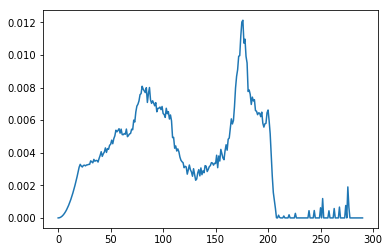

In [94]:
plt.plot(E,g)

In [24]:
print(value_300)

0.000215776155337


In [25]:
RF_T_300 = np.transpose(res_mat300)
m_300 = F(RF_T_300, res_mat300)
max_delta_300 = 2. / LA.norm(m_300, ord=1)
print (max_delta_300)

1.95942980415


In [26]:
delta_300 = max_delta_300*0.5

In [27]:
ini_uZ_300 = np.zeros(Eaxis_300.shape[0])
ini_vZ_300 = np.zeros(Eaxis_300.shape[0])
neu_N_300= np.linalg.norm(g1_300, 2)**2 / 2/delta_300/np.linalg.norm(g1_300,1)
print(neu_N_300)

0.00302803505356


# Bregman Split

In [31]:
reload (spbs)

<module 'srins.powder.bregmanSplit' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/bregmanSplit.pyc'>

In [32]:
recSplit_300, itS_300= spbs.split_Bregman(g1_300, res_mat300, ini_vZ_300, ini_uZ_300, neu_N_300, delta_300, value_300, 20)

In [33]:
print (neu_N_300, delta_300, value_300, max_delta_300)

0.00302803505356 0.979714902076 0.000215776155337 1.95942980415


In [37]:
print(itS_300)

3


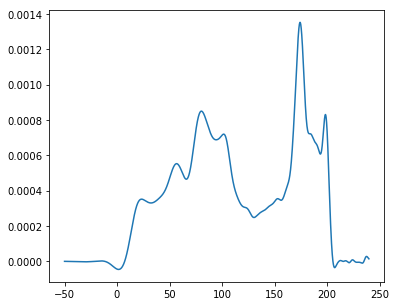

In [36]:
plt.figure(figsize=(6,5))
plt.plot(Eaxis_300, recSplit_300/np.sum(recSplit_300))
plt.show()

# Reading  saved DFT file 

In [38]:
from pylab import genfromtxt;
read_DFT_dat=genfromtxt("DFT.dat")

# Padding the DFT data

In [ ]:
# RF3_read = np.load("res_matrix_Ei_300.npy")

# horizontal_frnt_addition=np.arange(-50,0.0,0.1)
# horizontal_back_addition=np.arange(205,240,0.1)

# read_DFT_x=np.concatenate((horizontal_frnt_addition,read_DFT_dat[:,0], horizontal_back_addition))

# len_DFT=len (read_DFT_dat[:,1])

# len_RF_row=RF3_read.shape[0]


# diff=np.abs(len_RF_row-len_DFT)

# if (diff%2==0):
#     start=(diff/2)-1
# else:
#     start=(diff)/2
# print (start)
# new_sigC=np.concatenate((np.concatenate ((np.zeros(int(start)), read_DFT_dat[:,1])), np.zeros(int(diff-start))))

# plt.figure('DFT')
# plt.suptitle('DFT')
# plt.plot(read_DFT_x, new_sigC)
# plt.xlabel('energy')
# plt.ylabel('intensity')
# plt.show()
    

In [ ]:
# DFT=np.interp(Eaxis, read_DFT_x, new_sigC)

In [40]:
DFT=np.interp(Eaxis_300, read_DFT_dat[:,0], read_DFT_dat[:,1])

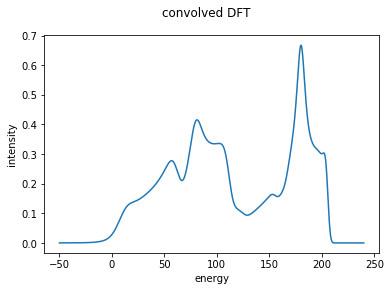

In [42]:
convolve_DFT=np.dot (DFT, res_mat300)

plt.figure('convolved DFT')
plt.suptitle('convolved DFT')
plt.plot(Eaxis_300, convolve_DFT)
plt.xlabel('energy')
plt.ylabel('intensity')

plt.show()

In [43]:
import srins.powder.scaling as scaling
import random

# Adding the noise to the convolved_DFT_300

In [44]:
scaleY1=scaling.scale(convolve_DFT, 0, 4000)

In [45]:
# r=[random.uniform(-1, 1) for _ in range(0, convolve_DFT.size)]
r = np.random.normal(size=convolve_DFT.size)
nP1=np.sqrt(scaleY1) * r #*np.abs(r)

In [ ]:
noisyConvolve_DFT=scaleY1+nP1

In [71]:
norm = noisyConvolve_DFT.sum()

In [72]:
noisyConvolve_DFT/=norm

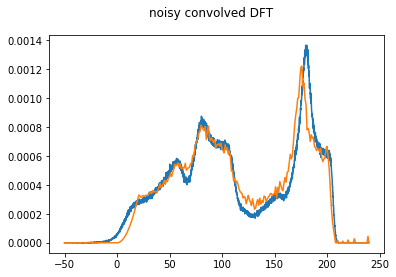

In [73]:
plt.figure()
plt.suptitle('noisy convolved DFT')
plt.plot(Eaxis_300, noisyConvolve_DFT)
plt.plot(Eaxis_300, g1_300/g1_300.sum())
plt.show()

(50, 150)

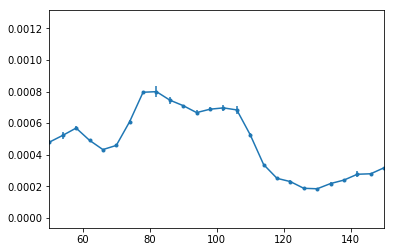

In [93]:
plt.errorbar(Eaxis_300[::40], noisyConvolve_DFT[::40], nP1[::40], marker='.')
plt.xlim(50, 150)

# reconstruction using Split Bregman

In [74]:
y3=noisyConvolve_DFT

In [75]:
Eaxis=H
delta=max_delta_300*.5

ini_uZ = np.zeros(Eaxis_300.shape[0])
ini_vZ = np.zeros(Eaxis_300.shape[0])
neu_N = np.linalg.norm(y3, 2)**2 / 2/delta/np.linalg.norm(y3,1)
print(neu_N)

0.000312972324728


In [78]:
nP1/=norm

In [79]:
value=np.sqrt(np.average(nP1**2))
# value=(np.average(nP1))
print (value)

1.07680587056e-05


In [66]:
reload (spbs)

<module 'srins.powder.bregmanSplit' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/bregmanSplit.pyc'>

In [80]:
print (neu_N, delta, value)

0.000312972324728 0.979714902076 1.07680587056e-05


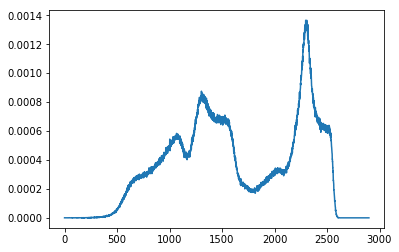

In [81]:
plt.plot(y3)

In [95]:
recSplit, itS= spbs.split_Bregman(y3, res_mat300, ini_vZ, ini_uZ, neu_N, delta, value, 200)
print (itS)

200


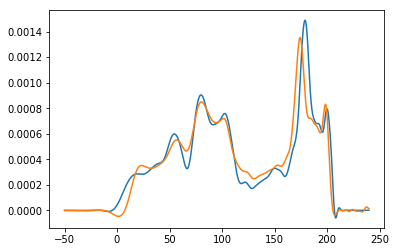

In [96]:
plt.figure()
plt.plot(Eaxis_300, recSplit/recSplit.sum())
plt.plot(Eaxis_300, recSplit_300/recSplit_300.sum())
plt.show()

In [ ]:
plt.figure()
plt.plot(Eaxis,(DFT/DFT.sum())+0.002, label='DFT')
plt.plot(Eaxis,(com/com.sum())+0.0015, label='Reconstructed DOS with Linearized Bregman (# of iteration:{})' .format(it_300))
plt.plot(Eaxis,(R_com/R_com.sum())+0.001, label='Reconstructed DOS with Lucy-Richardson(# of iteration:{})'.format(In_300))
plt.plot(Eaxis,(recSplit_com/recSplit_com.sum())+0.0005, label='Reconstructed DOS with Split Bregman(# of iteration:{})'.format(itS_300))

plt.plot(Eaxis,(g1_com/g1_com.sum()), label='Raw DOS')
plt.legend(fontsize='large',bbox_to_anchor=(0.8, 0.8))
plt.xlabel('E')
plt.ylabel('Intensity')
plt.show()

In [ ]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

In [ ]:
H=Eaxis

In [ ]:
A=np.zeros((len(H),len(H)))
sig=2
for i, h in enumerate(H):
    A[i]=gauss(H, 1, h, sig)
print  (A.shape[1])

In [ ]:
DFT_convolvedGaus=np.dot(DFT, A)

In [ ]:
plt.figure()
plt.plot(Eaxis,(DFT/DFT.sum())+0.002, label='DFT')
plt.plot(Eaxis,(DFT_convolvedGaus/DFT_convolvedGaus.sum())+0.0015, label='Uniform resolution effect on DFT')
plt.plot(Eaxis,(g1_com/g1_com.sum())+0.0007, label='Raw DOS')
plt.plot(Eaxis,(com/com.sum()), label='Reconstructed DOS (Linearized Bregman)' )
plt.xlabel('E')
plt.ylabel('Intensity')
plt.legend(fontsize='large',bbox_to_anchor=(0.8, 0.8))
plt.show()

# regularized Lucy Richardson 

In [ ]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Regularized_LucyRichardson_L1norm.pyc
import srins.powder.Regularized_LucyRichardson_L1norm as L1lr
reload(L1lr)

In [ ]:
r1,E1,EB1,In1=L1lr.deconvolve_L1_NS(g1, res_mat1, ini1, 0.004, 0.0001, 'errorModel', value, maxIter=100)

In [ ]:
print ('no of iteration for regularized Lucy richardson: ', In1)

In [ ]:
plt.figure()
plt.plot(Eaxis, r1/r1.sum())
# plt.plot(R/R.sum())
plt.show()

# comparison

In [ ]:
plt.figure()
plt.plot(Eaxis, RU/RU.sum(), label='Linearized Bregman')
plt.plot(Eaxis, recSplit/recSplit.sum()+0.0005, label='Bregman Split')
plt.plot(Eaxis,R/R.sum()+0.001,label='Lucy Richardson')
# plt.plot(Eaxis, r1/r1.sum()+0.00,label='Regularized Lucy Richardson')
plt.legend(fontsize='x-large',loc='upper right', bbox_to_anchor=(.59, 1.12))
plt.ylabel('Intensity')
plt.xlabel('E')
# plt.xlim(0,200)
plt.show()